<a href="https://colab.research.google.com/github/PCR-git/Repo1/blob/master/Stats_202A_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Data

In [0]:
# Imports
import numpy as np
import tensorflow as tf

In [3]:
# Load MNIST 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the samples from integers to floating-point numbers:
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


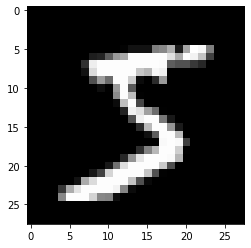

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

## Build a Simple, Fully-Connected Network using Keras

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

batch_size = 10000
num_epochs = 5
loss ='sparse_categorical_crossentropy'
optimizer = 'adam' # Use Adam optimizer. Improves final accuracy by ~7%.

# batch = np.random.shuffle([x_train,y_train])

# Shuffle the data and take the first 10,000 images:
c = np.c_[x_train.reshape(len(x_train), -1), y_train.reshape(len(y_train), -1)]
a2 = c[:, :x_train.size//len(x_train)].reshape(x_train.shape)
b2 = c[:, x_train.size//len(x_train):].reshape(y_train.shape)

# Reshape the data for passing to 2D convolution:
x_train_b = a2[0:batch_size]
y_train_b = b2[0:batch_size]

# Model 1 Structure:
# Fully Connected -> ReLu -> Dropout -> Fully Connected -> Softmax
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

history1 = model1.fit(x_train_b, y_train_b, epochs=num_epochs, shuffle = 'True')

model1.evaluate(x_test,  y_test, verbose=2)

loss1 = history1.history['loss']
acc1 = history1.history['acc']

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 474us/sample - loss: 0.5672 - acc: 0.8408s - loss: 0.5875 - acc: 0.
Epoch 2/5
10000/10000 [==============================] - 3s 328us/sample - loss: 0.2800 - acc: 0.9207
Epoch 3/5
10000/10000 [==============================] - 3s 297us/sample - loss: 0.2092 - acc: 0.9416
Epoch 4/5
10000/10000 [==============================] - 3s 328us/sample - loss: 0.1686 - acc: 0.9520
Epoch 5/5
10000/10000 [==============================] - 4s 360us/sample - loss: 0.1388 - acc: 0.9608
10000/10000 - 1s - loss: 0.1884 - acc: 0.9419


In [0]:
import matplotlib.pyplot as plt

# Plot function:
def plot_la(num_epochs, loss, acc):
    epoch_v = np.linspace(1,num_epochs,num_epochs)

    ## Plot of the loss vs epoch:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (14,7))
    # fig, ax = plt.subplots(1, 1, figsize = (7,7))
    ax1.plot(epoch_v, loss, '-', color = "black")
    ax1.set_title('Loss per Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid()

    ## Plot of the accuracy vs epoch:
    ax2.plot(epoch_v, acc, '-', color = "black")
    ax2.set_title('Accuracy per Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    plt.show()

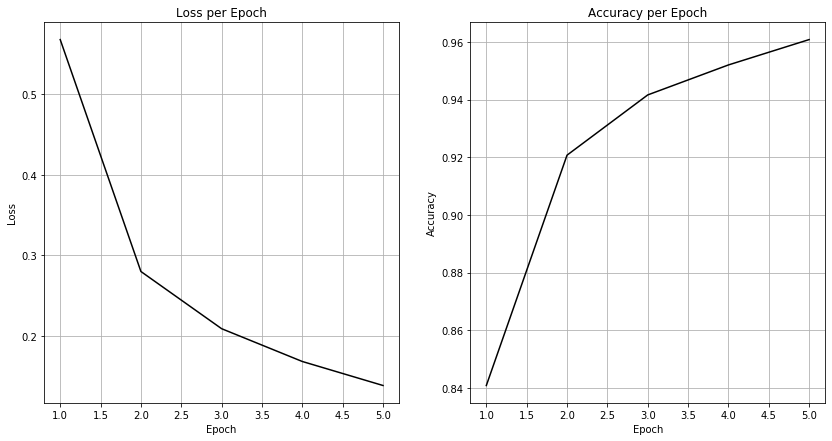

In [0]:
plot_la(num_epochs, loss1, acc1)

## Build a Convolutional Network

In [0]:
batch_size = 10000
num_epochs = 5
loss ='sparse_categorical_crossentropy'
optimizer = 'adam'

# Shuffle the data and take the first 10,000 images:
c = np.c_[x_train.reshape(len(x_train), -1), y_train.reshape(len(y_train), -1)]
a2 = c[:, :x_train.size//len(x_train)].reshape(x_train.shape)
b2 = c[:, x_train.size//len(x_train):].reshape(y_train.shape)
x_train_b = a2[0:batch_size]
y_train_b = b2[0:batch_size]

# Reshape the data for passing to 2D convolution:
x_train_b = np.reshape(x_train_b, (batch_size, 28, 28, 1))
x_test_b = np.reshape(x_test, (int(np.size(x_test)/784), 28, 28, 1))

# Model 2 Structure:
# (2D Convolution -> ReLu -> Batch Norm -> Max Pool -> Dropout)x2 -> Fully Connected
# -> ReLu -> Batch Norm -> Dropout -> Fully Connected --> Softmax
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.20),
  tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.30),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

history2 = model2.fit(x_train_b, y_train_b, epochs=num_epochs, shuffle = 'True')

model2.evaluate(x_test_b,  y_test, verbose=2)

loss2 = history2.history['loss']
acc2 = history2.history['acc']

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 36s 4ms/sample - loss: 0.3782 - acc: 0.8825
Epoch 2/5
10000/10000 [==============================] - 35s 3ms/sample - loss: 0.1487 - acc: 0.9567
Epoch 3/5
10000/10000 [==============================] - 35s 4ms/sample - loss: 0.1016 - acc: 0.9696
Epoch 4/5
10000/10000 [==============================] - 35s 4ms/sample - loss: 0.0807 - acc: 0.9742
Epoch 5/5
10000/10000 [==============================] - 33s 3ms/sample - loss: 0.0725 - acc: 0.9774
10000/10000 - 11s - loss: 0.0632 - acc: 0.9800


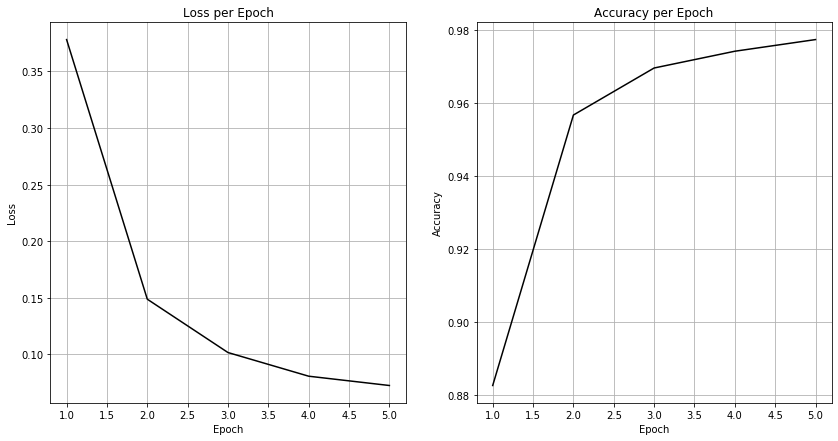

In [0]:
plot_la(num_epochs, loss2, acc2)

In [0]:
# Testing accuracy: 98%. Accuracy improved by about 4%.